## 1. 載入套件

In [100]:
import pandas as pd                  #用於數據處理和操做
import matplotlib.pyplot as plt     # 用於繪製圖表和視覺化
import seaborn as sns                # 提供更美觀的圖表風格和統計視覺化
import numpy as np                   # 數值計算和陣列操作
# 修正原筆者的程式碼
# from scipy.stats import norm 改成 import stats
import scipy.stats as stats           # 統計分布和函數
from sklearn.preprocessing import StandardScaler   # 數據標準化
import warnings                      # 控制警告訊息的顯示與隱藏
warnings.filterwarnings('ignore')    # 忽略警告訊息的顯示
 # 在 Jupyter Notebook 中內嵌繪圖
%matplotlib inline                  

In [101]:
# df_train 為 train.csv 資料
df_train = pd.read_csv(r'E:\DataLearn\1.House\data\train.csv')
# 查看 train.csv 資料欄位有哪些
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2. 數據頗析

In [102]:
# 查看描述性統計
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### 從以上來看，房價最低價格大於0

<Axes: xlabel='SalePrice', ylabel='Density'>

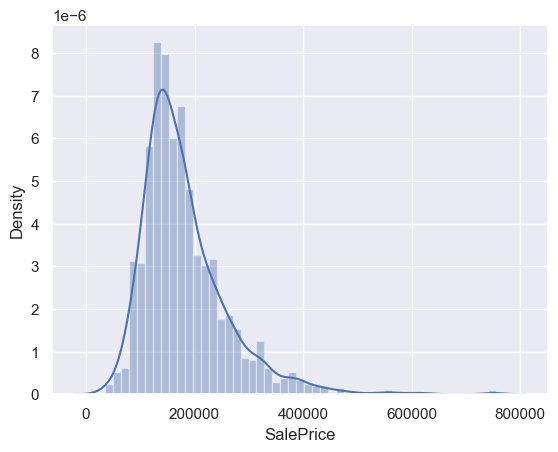

In [103]:
# 繪製房價直方圖來查看查看數據分佈範圍.
# 使用 Seaborn 的 distplot
sns.distplot(df_train['SalePrice'])

#### 以上圖表解讀
* 1.偏離正態分佈。表示數據分佈非左右對稱
* 2.正偏斜度。數據有一些離群值存在
* 3.峰值高

### 查看 偏度 與 峰度

In [104]:
print("偏度 : %f" % df_train['SalePrice'].skew())
print("峰度 : %f" % df_train['SalePrice'].kurt())

偏度 : 1.882876
峰度 : 6.536282


### 探討變數之間的關係

* 1. 先來看看 GrLivArea : 地面之上的面積 與 SalePrice 之間的關係

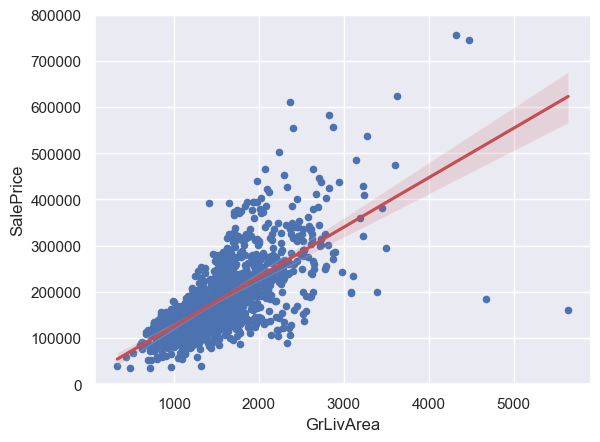

In [105]:
# GrLivArea : 地面之上的面積
# X軸變數
var_1 = 'GrLivArea'
# 使用 SalePrice 與 GrLivArea 生成一個 data
data_1 = pd.concat([df_train['SalePrice'], df_train[var_1]], axis=1)
# ylim => y 軸數字介於 0-80000 之間
data_1.plot.scatter(x=var_1, y='SalePrice', ylim=(0, 800000))
# 加入線性迴歸線。
# scatter=False 參數來指示函數不要在散點圖上繪製散點，只畫出線性迴歸線。
sns.regplot(x=var_1, y='SalePrice', data=data_1, scatter=False, color='r')
plt.show()

> 從以上的圖來看發現，土地面積與售價呈現線性關係，也就是售價與土地面積成正比

* 2. 探討 TotalBsmtSF 地下室總面積 與 售價關係

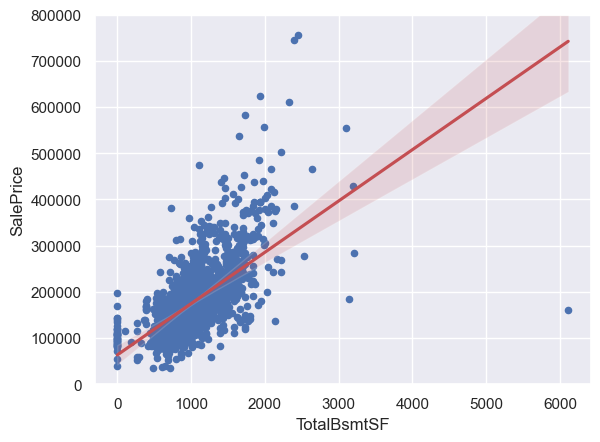

In [106]:
var_2 = 'TotalBsmtSF'
data_2 = pd.concat([df_train['SalePrice'], df_train[var_2]], axis=1)
data_2.plot.scatter(x=var_2, y='SalePrice', ylim=(0, 800000))
sns.regplot(x=var_2, y='SalePrice', data=data_2, scatter=False, color='r')
plt.show()

> 從以上的圖來看發現，地下室面積 與 售價 呈現線性關係，也就是售價與土地面積成正比，而且對比土地面積來說變化更加劇烈

* 3. 觀察 OverallQual 房子整體材料與飾面等級 與 房價關係

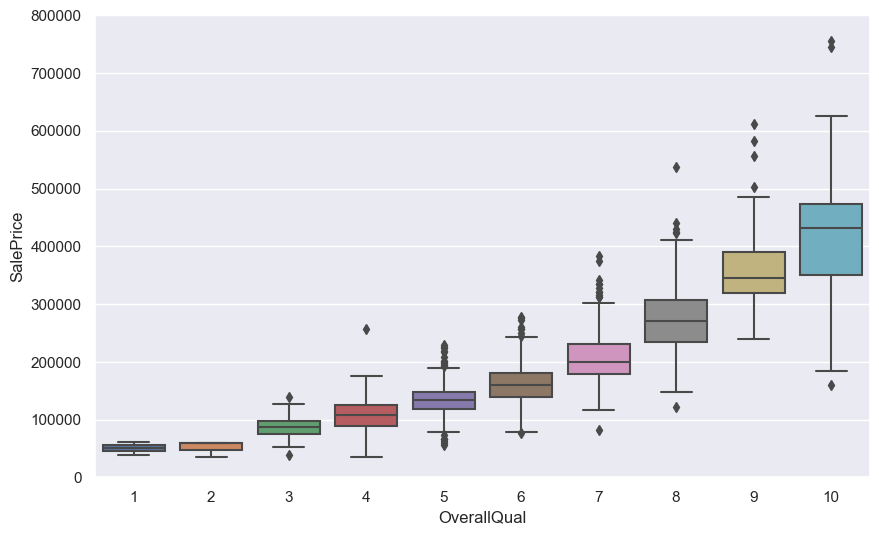

In [107]:
var_3 = 'OverallQual'
data_3 = pd.concat([df_train['SalePrice'], df_train[var_3]], axis=1)
# f 和 ax 是用於表示圖表和子圖的變數。
f, ax = plt.subplots(figsize = (10, 6))
fig_1 = sns.boxplot(x=var_3, y='SalePrice', data=data_3)
fig_1.axis(ymin=0, ymax=800000);

> 可以看到說隨著裝修等級越高，房價坐落區間也會比較高

* 4.YearBuilt 建照年份 與 售價之間的關係

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

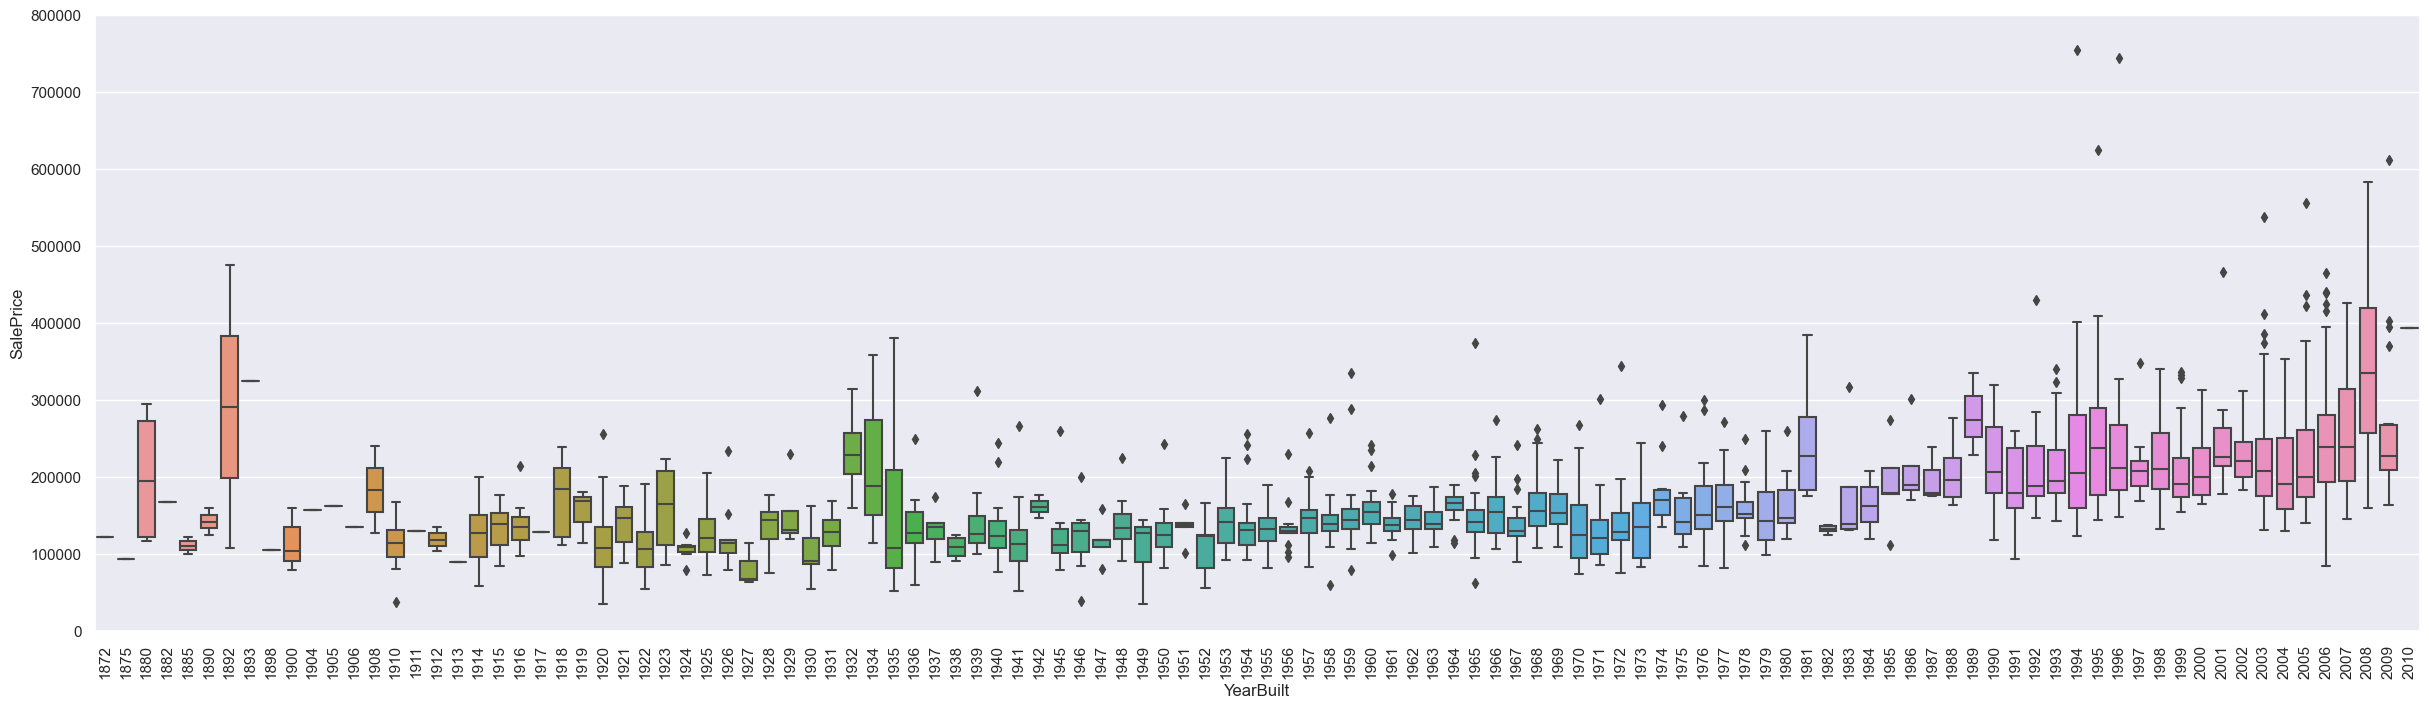

In [108]:
var_4 = 'YearBuilt'
data_4 = pd.concat([df_train['SalePrice'], df_train[var_4]], axis=1)
f, ax = plt.subplots(figsize=(30, 8))
fig_2 = sns.boxplot(x=var_4, y='SalePrice', data=data_4)
fig_2.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

> 根據上面圖表來看，似乎年份月新的物件價值相較於年費較久的更高

## 3. 繪製資料 相關係數矩陣

<Axes: >

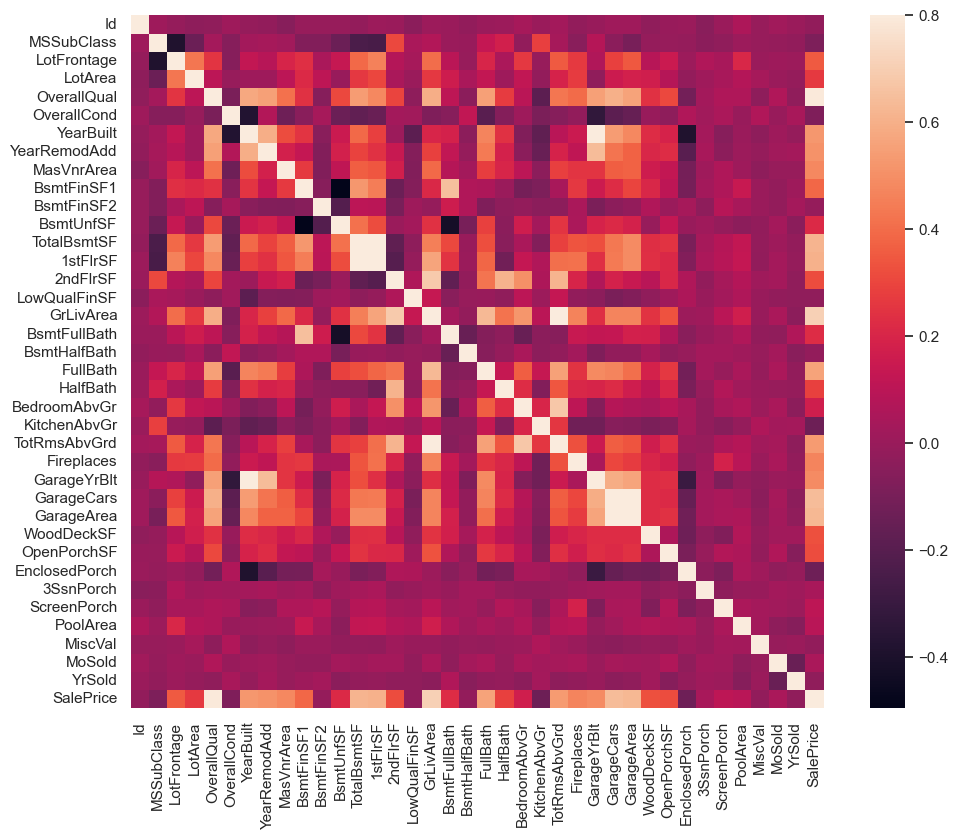

In [109]:
# 計算 df_train 資料裡頭各變數之間相關矩陣
# 相關矩陣介於 -1 ~ 1 數值。 > 0 為正相關， < 0 為負相關
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
# heatmap 創建熱圖像。 vmax=.8 設置了顏色尺度的最大值，square=True 則表示要繪製正方形的熱圖。
# 顏色越淺表示相關性越高
sns.heatmap(corrmat, vmax=.8, square=True)

>從以上可以看到， 'GrLivArea'、'TotalBsmtSF' 和 'OverallQual' 與 SalePrice 都具有正相關，而另外有其他欄位資料也有正相關跡像，也值得去思考其關聯性

### 繪製正相關資料欄位的相關矩陣圖

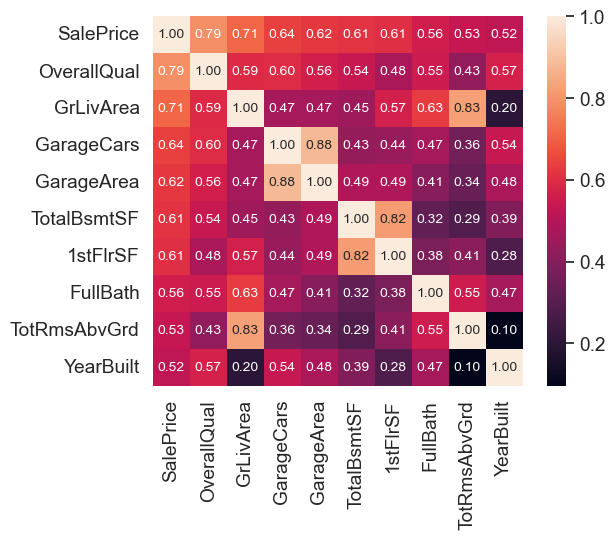

In [110]:
# 設定選擇與 SalePrice 相關係數最高的前 10 個變數
k = 10
# .nlargest 是一個用於選擇數列（Series）中最大值的方法，這裡意思是選10個
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# cm => 計算相關係數矩陣。 .values.T 轉置變數列方便計算相關係數
cm = np.corrcoef(df_train[cols].values.T)
# 設定熱像矩陣圖裡的字體大小
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                 cbar=True,       # 表示在圖上顯示顏色條。
                 annot=True,      # 表示在熱力圖的每個格子中顯示相關係數的數值。
                 square=True,     # 表示將圖形設置為正方形。
                 fmt='.2f',       # 指定數值的格式為小數點後 2 位浮點數。
                 annot_kws={'size': 10},   # 設定了相關係數數值的字體大小。
                 yticklabels=cols.values,   
                 xticklabels=cols.values)
plt.show()

* 1.'OverallQual'、'GrLivArea' 和 'TotalBsmtSF' 與 'SalePrice' 有著強烈的相關性。
* 2.'GarageCars' 和 'GarageArea' 也是相關性最強的變數之一，但GarageCars更高，所以採用 GarageCars
* 3.'TotalBsmtSF' 和 '1stFloor' 很接近的數據，所以我們保留 TotalBsmtSF

### 繪製 與 SalePrcie 變數最具正相關的點散圖

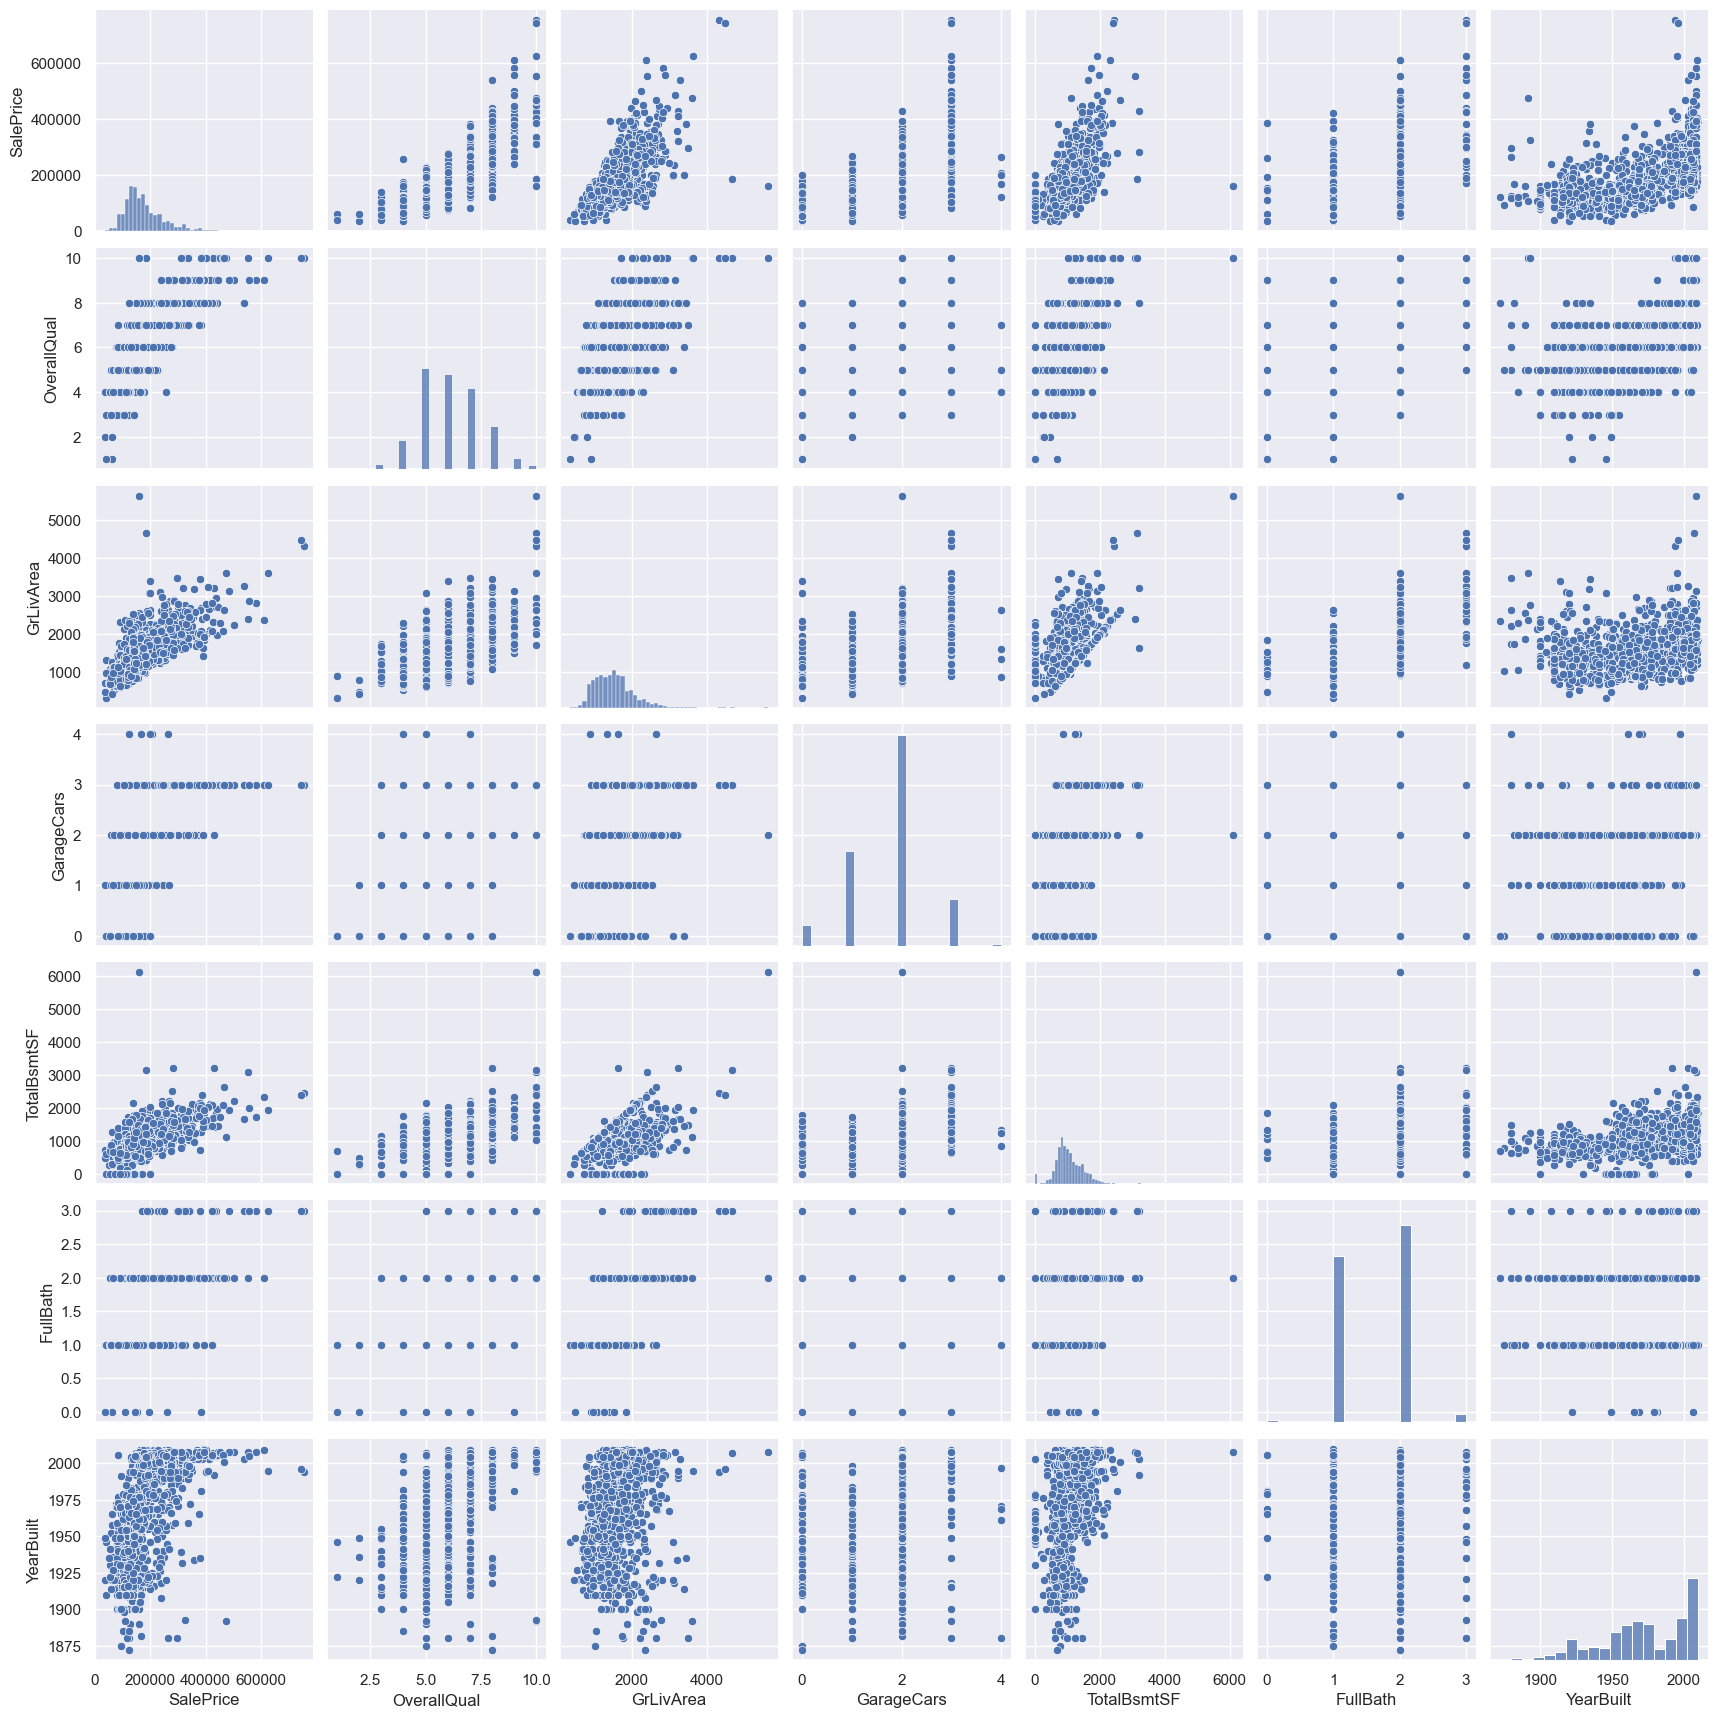

In [111]:
# 設定 Seaborn 库的默認繪圖風格。
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# height 2.5版 seaborn size 改為 height，點散圖大小
sns.pairplot(df_train[cols], height = 2.5)
plt.show()

## 4. 進行補空值

In [112]:
# 計算每個變數的遺漏值數量，並按照由大到小排列
total_null = df_train.isnull().sum().sort_values(ascending = False)
# 計算每個變數缺失數值，與每個變數缺失的比例
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
# 建立一個 df 來列出每個變數的遺漏值與比例， 欄位以 Total 與 Percent
missing_data = pd.concat([total_null, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


### 解決遺漏值
* 1.考慮將超過 15% 以上的變數進行刪除，而以上超過 15% 的變數並無之前計算過關聯性較高的變數
* 2.另外 'PoolQC'、 'MiscFeature' 與 'FireplaceQu' 遺漏值比率極高，所以也要刪除
* 3.而 Electrical 只有一個遺漏值，所以保留該變數但刪除有遺漏值得觀察值

In [113]:
# 處理 Electrical 遺漏值
# 刪除變數有1個以上遺漏值的變數。 index選取對應索引。 1表示為刪除列而不是欄
df_train = df_train.drop((missing_data[missing_data['Total']>1]).index, 1)
# 刪除 'Electrical' 欄位中帶有遺漏值的那列觀察值
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
# 這行程式碼檢查是否還存在任何缺失數據
df_train.isnull().sum().max()

0

### 處理異常數值
* 1. 將每個數值 減去平均值後除 標準差。 使數據分佈更加標準化
* 2. 常見的標準化方法包括 Z-Score 標準化和 Min-Max 標準化。在 Z-Score 標準化中，每個數據點都減去平均值，然後除以標準差。在 Min-Max 標準化中，數據被縮放到一個指定的範圍內，通常是0到1之間。

#### 進行 單變量分析 

In [114]:
# 進行 單變量分析 
# StandardScaler() 進行標準化，將數值轉為均值為 0 標準差為 1 的形式
# [:,np.newaxis] 是為了將 'SalePrice' 數據轉換為列向量的形式，
SalePrice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])
# 這行程式碼將標準化後的 'SalePrice' 按照數值大小進行排序，取排在前面的 10 個數據
low_range = SalePrice_scaled[SalePrice_scaled[:, 0].argsort()][:10]
# 這行程式碼將標準化後的 'SalePrice' 按照數值大小進行排序，取排在後面的 10 個數據
high_range = SalePrice_scaled[SalePrice_scaled[:, 0].argsort()][-10:]
print('分佈的外部範圍（低）：')
print(low_range)
print('分佈的外部範圍（高）：')
print(high_range)

分佈的外部範圍（低）：
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
分佈的外部範圍（高）：
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


較低範圍的數值非常接近，而高範圍的部分有 2個 7.多的數值別突出

#### 進行 雙變量分析

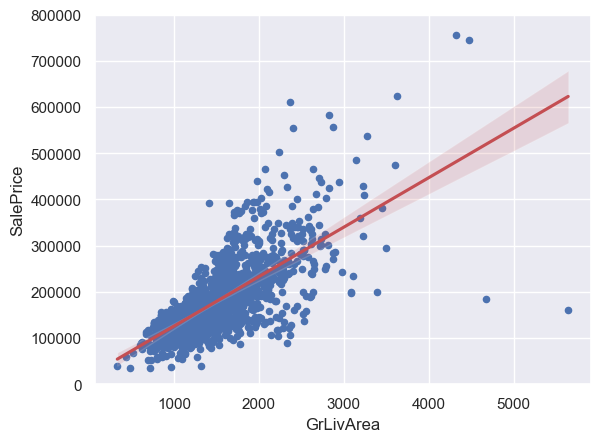

In [115]:
#房屋售價對比土地面積
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
sns.regplot(x=var, y='SalePrice', data=data, scatter=False, color='r')
plt.show()

右下有兩個點 未因為土地面積越大就售價越高，常理來看為異常值，可以進行刪除

In [116]:
# 依照圖片來看，必須先尋找出 GrLivArea > 4000 以上的數值在哪，並挑出土地價個最低的兩筆
df_findGrLivArea = df_train[df_train['GrLivArea'] > 4000]
df_findGrLivArea

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [117]:
# 從以上表格可以看到，ID 524 與 1299 SalePrice 比較異常，因此刪除
df_train = df_train.drop(df_train[df_train['Id'].isin([1299, 524])].index)

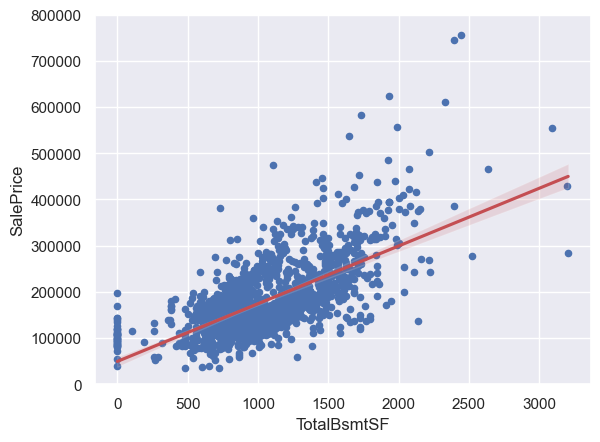

In [118]:
# 分析 地下室總面積 / 售價
var_1 = 'TotalBsmtSF'
data_1 = pd.concat([df_train['SalePrice'], df_train[var_1]], axis=1)
data_1.plot.scatter(x=var_1, y='SalePrice', ylim=(0,800000));
sns.regplot(x=var_1, y='SalePrice', data=data_1, scatter=False, color='r')
plt.show()

以上分佈來看，TotalBsmtSF>3000 來看到是還好，可以選擇不處理

#### 進行正態檢驗

#### 1. 檢驗 SalePrice

<Axes: xlabel='SalePrice', ylabel='Density'>

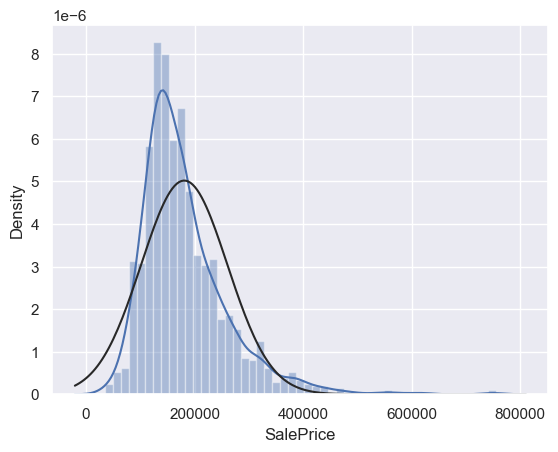

In [119]:
# 繪製 'SalePrice' 資料分佈
# fit = norm 如果以原筆者的程式 import norm 會出現 error，且無法繪製曲線
sns.distplot(df_train['SalePrice'], fit=norm)  

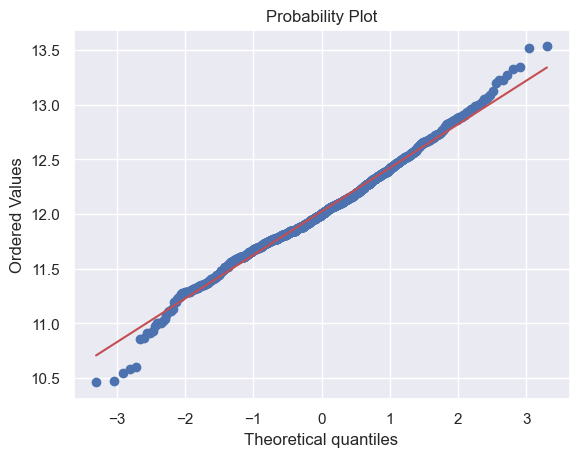

In [129]:
# 這兩行程式碼用於繪製正態概率圖
plt.figure()
stats.probplot(df_train['SalePrice'], plot=plt)
# 显示图形
plt.show()

從以上的圖表可以發現， SalePrice 的資料分佈非正態，資料呈現左偏，而為依照斜直線周圍均勻分布

In [121]:
# 使用 Numpy 的 log 進行對數運算
df_train['SalePrice'] = np.log(df_train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

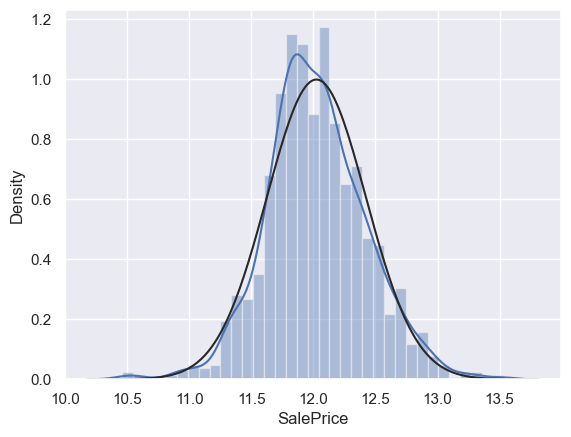

In [122]:
sns.distplot(df_train['SalePrice'], fit=norm)

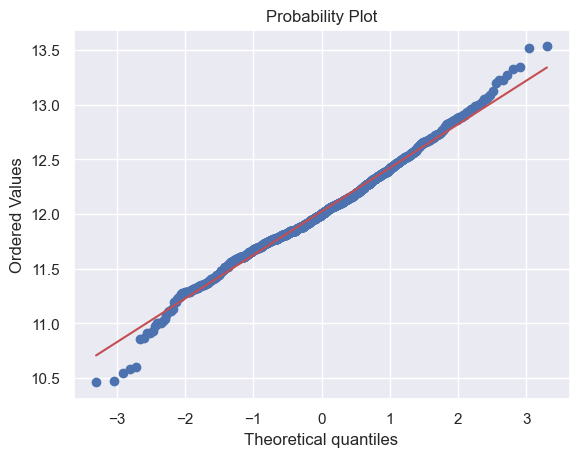

In [123]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

* 1.從以上圖片來看，取 log 後的 SalePrice 資料分佈左右較對稱，且並沒有特別偏向一邊
* 2.而資料分布也沿著正態斜線

#### 2. 檢驗 GrLivArea 地面之上的面積

<Axes: xlabel='GrLivArea', ylabel='Density'>

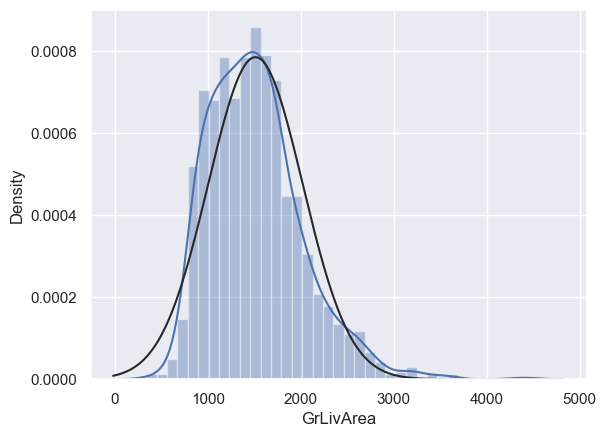

In [124]:
sns.distplot(df_train['GrLivArea'], fit=norm)

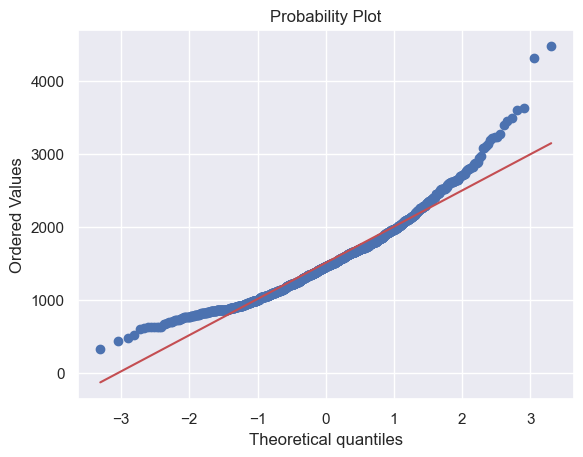

In [125]:
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

從上面 GrLivArea 的資料分布來看，也是呈現左偏，而且資料分布並未在斜線周圍

In [126]:
# 對 GrLivArea 進行 log 處理
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

<Axes: xlabel='GrLivArea', ylabel='Density'>

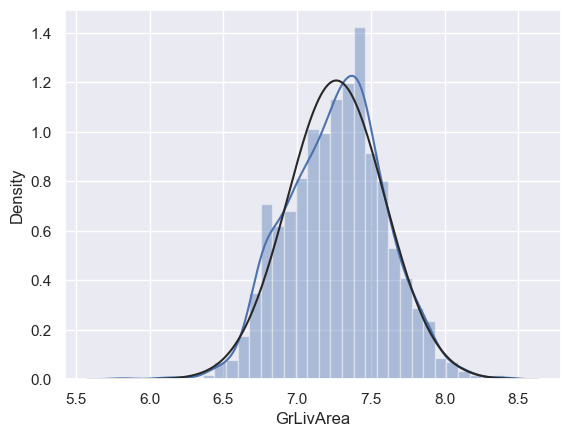

In [127]:
sns.distplot(df_train['GrLivArea'], fit=norm)

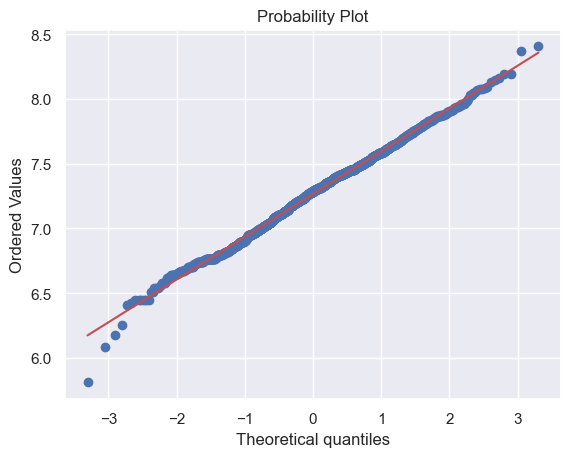

In [128]:
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

#### 3. 檢驗 TotalBsmtSF 地下室總面積

<Axes: xlabel='TotalBsmtSF', ylabel='Density'>

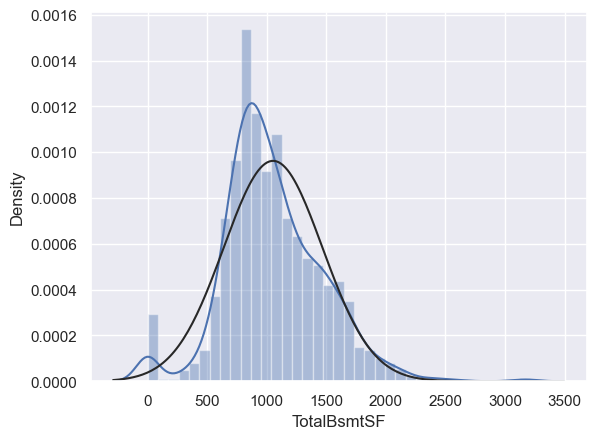

In [131]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm)

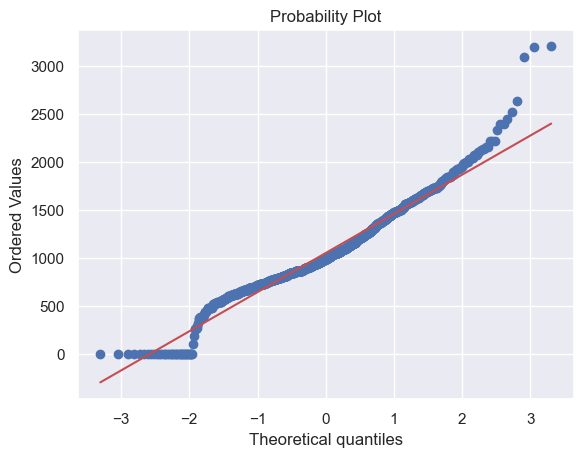

In [133]:
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

處理 TotalBsmtSF 沒有地下室的觀察值
* 1.將資料轉成 二進制變數
* 2.將非零的觀察值進行轉換並且忽略為零的觀察值

In [135]:
# 創建一個新的變數 HasBsmt 變數
# pd.Series 生成類似陣列的資料
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
# 初始化值皆為零
df_train['HasBsmt'] = 0
# 當 TotalBsmtSF 值大於零則表示有地下室，對應的HasBsmt 則判斷為1
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [136]:
df_train['HasBsmt']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: HasBsmt, Length: 1457, dtype: int64

In [137]:
# 對那些具有地下室的資料進行 np.log 轉換數據
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

<Axes: xlabel='TotalBsmtSF', ylabel='Density'>

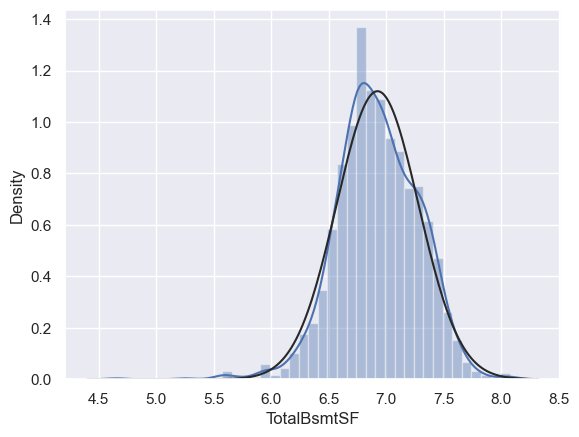

In [139]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)

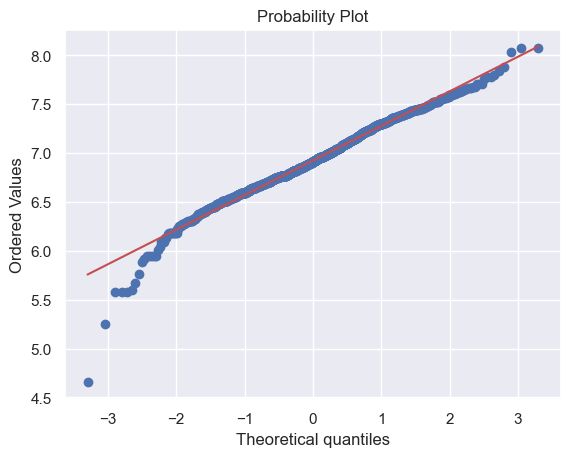

In [140]:
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### 來分析 homoscedasticity 

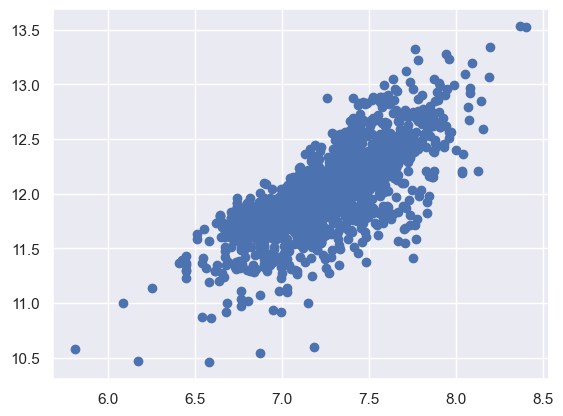

In [141]:
# 從 GrLivArea 與 SalePrice 開始
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

對比之前的 GrLivArea 與 SalePrice 關聯圖來說，點散不再以錐形分布，而是均勻分布

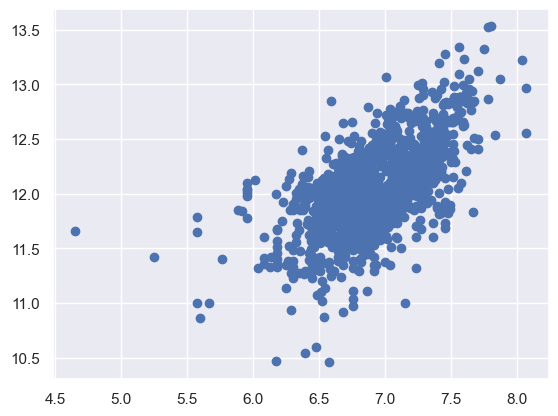

In [144]:
# 接下來分析 'TotalBsmtSF' 與 'SalePrice'
# 'TotalBsmtSF' 以有地下室的觀察值作為比較
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], 
            df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

對比之前的 TotalBsmtSF 與 SalePrice 來說也有均勻分布

In [146]:
df_train = pd.get_dummies(df_train)
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0
